In [ ]:
getwd()
setwd("/content")
getwd()

[1] "/content"

[1] "/content"

In [ ]:
install.packages("forecast", repos = "https://cran.rstudio.com")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("TSA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data = read.csv("yield-curve-rates-1990-2023.csv")
data$Date = as.Date(data$Date,format = "%m/%d/%y")
data = data[order(data$Date),]
x = data$Date
y = data$X10.Yr
valid_indices = !is.na(y)
x <-x[valid_indices]
y <-y[valid_indices]
x = x[-1]
y = diff(log(y))
cutoff <- x<as.Date("2020-01-01")
x = x[cutoff]
y = y[cutoff]

In [ ]:
png("data_show.png",width = 2400,height = 1800,res=300)
plot(x, y, type = "l", col = "blue", xlab = "Date", ylab = "Log Difference of 10-Year Yield",
    main = "Log Difference of 10-Year Yield Curve (1990-2020)")
dev.off()

pdf 
  2

In [ ]:
png("acf.png",width = 2400,height = 1800,res=300)
acf(y,lag.max = 10)
dev.off()

pdf 
  2

In [ ]:
at = y - mean(y)

In [ ]:
Box.test(at^2,lag=12,type = "Ljung")


	Box-Ljung test

data:  at^2
X-squared = 2136.4, df = 12, p-value < 2.2e-16


In [ ]:
Box.test(arima(y,order = c(0,0,5))$resid^2,lag = 12,type = "Ljung")


	Box-Ljung test

data:  arima(y, order = c(0, 0, 5))$resid^2
X-squared = 2077.6, df = 12, p-value < 2.2e-16


In [ ]:
install.packages("fGarch")
library(fGarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘gss’, ‘stabledist’, ‘gbutils’, ‘Rdpack’, ‘fBasics’, ‘timeSeries’, ‘fastICA’, ‘cvar’


NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")



In [ ]:
arima_model <- arima(y, order = c(0, 0, 5))
residuals <- residuals(arima_model)

In [ ]:
arima_model


Call:
arima(x = y, order = c(0, 0, 5))

Coefficients:
         ma1      ma2     ma3      ma4      ma5  intercept
      0.0022  -0.0163  0.0018  -0.0158  -0.0456     -2e-04
s.e.  0.0115   0.0115  0.0115   0.0115   0.0113      2e-04

sigma^2 estimated as 0.0002726:  log likelihood = 20146.8,  aic = -40279.61

In [ ]:
install.packages("rugarch")
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘nloptr’


Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma




In [ ]:
spec <- ugarchspec(variance.model = list(model = "sGARCH", garchOrder = c(1, 1)),
                   mean.model = list(armaOrder = c(0, 0), include.mean = FALSE))
fit <- ugarchfit(spec, residuals)

In [ ]:
fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000001    0.000000   1.3354  0.18176
alpha1  0.044881    0.002267  19.7992  0.00000
beta1   0.954053    0.002088 456.9692  0.00000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
omega   0.000001    0.000002   0.21399  0.83055
alpha1  0.044881    0.008212   5.46505  0.00000
beta1   0.954053    0.008330 114.53262  0.00000

LogLikelihood : 21685.21 

Information Criteria
------------------------------------
                    
Akaike       -5.7788
Bayes        -5.7761
Shibata      -5.7788
Hannan-Quinn -5.7779

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
       

In [ ]:
arimagarch=garchFit(y~arma(0,5)+garch(1,1),data=y,trace=F)

In [ ]:
options(digits = 20)
arimagarch


Title:
 GARCH Modelling 

Call:
 garchFit(formula = y ~ arma(0, 5) + garch(1, 1), data = y, trace = F) 

Mean and Variance Equation:
 data ~ arma(0, 5) + garch(1, 1)
<environment: 0x56eb86a9c198>
 [data = y]

Conditional Distribution:
 norm 

Coefficient(s):
                    mu                     ma1                     ma2  
-2.347209508103570e-04   2.624279507404471e-02  -8.186933892960994e-03  
                   ma3                     ma4                     ma5  
-2.150536591782613e-02  -1.416939805829436e-02  -2.907104828659552e-02  
                 omega                  alpha1                   beta1  
 5.119364456357116e-07   4.523359133329109e-02   9.537269081626907e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
                    Estimate            Std. Error   t value   Pr(>|t|)    
mu     -2.34720950810357e-04  1.22808218728442e-04  -1.91128   0.055969 .  
ma1     2.62427950740447e-02  1.19853093227009e-02   2.18958   0.028555 *  
ma2    -8.18693389296099

In [ ]:
arimagarch01=garchFit(y~arma(0,1)+garch(1,1),data=y,trace=F)
options(digits = 10)
arimagarch01


Title:
 GARCH Modelling 

Call:
 garchFit(formula = y ~ arma(0, 1) + garch(1, 1), data = y, trace = F) 

Mean and Variance Equation:
 data ~ arma(0, 1) + garch(1, 1)
<environment: 0x56eb893c7ea0>
 [data = y]

Conditional Distribution:
 norm 

Coefficient(s):
          mu           ma1         omega        alpha1         beta1  
-2.39492e-04   2.78968e-02   5.11739e-07   4.52722e-02   9.53696e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
          Estimate  Std. Error  t value  Pr(>|t|)    
mu     -2.3949e-04  1.3206e-04  -1.8135   0.06975 .  
ma1     2.7897e-02  1.2064e-02   2.3124   0.02075 *  
omega   5.1174e-07  1.1901e-07   4.2999 1.709e-05 ***
alpha1  4.5272e-02  3.4823e-03  13.0006 < 2.2e-16 ***
beta1   9.5370e-01  3.3706e-03 282.9490 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 21685.29578    normalized:  2.889831528 

Description:
 Thu Nov 28 15:49:57 2024 by user:  


In [ ]:
residuals <- residuals(arimagarch01)
head(residuals)
sigma_t <- arimagarch01@sigma.t
head(sigma_t)
stdresi <- residuals / sigma_t
head(stdresi)

[1]  0.0000000000000 -0.0010128566556  0.0015200954327  0.0039447479692
[5]  0.0001294458322  0.0014819866172

[1] 0.01654509614 0.01617333333 0.01581211171 0.01546163627 0.01513964697
[6] 0.01480230205

[1]  0.000000000000 -0.062625102369  0.096134878138  0.255131339216
[5]  0.008550122233  0.100118658064

In [ ]:
png("sigma_t.png",width = 2400,height = 1800,res=300)
plot(x, sigma_t,xlab = "Date",type = 'l')
dev.off()

pdf 
  2

In [ ]:
png("garch_resi.png",width = 2400,height = 1800,res=300)
plot(x,stdresi,xlab = 'Date',type = 'l')
dev.off()

pdf 
  2

In [ ]:
png("garch_acf_res.png",width = 2400,height = 1800,res=300)
acf(stdresi, lag.max = 12,xlim = c(1, 12),ylim = c(-0.03,0.03))
dev.off()

Box.test(stdresi, lag = 12, type = "Ljung-Box")

png("garch_acf_res^2.png",width = 2400,height = 1800,res=300)
acf(stdresi^2, lag.max = 12,xlim = c(1, 12),ylim = c(-0.03,0.03))
dev.off()

Box.test(stdresi^2, lag = 12, type = "Ljung-Box")


pdf 
  2


	Box-Ljung test

data:  stdresi
X-squared = 12.641018, df = 12, p-value = 0.3956637


pdf 
  2


	Box-Ljung test

data:  stdresi^2
X-squared = 12.434655, df = 12, p-value = 0.4114329


In [ ]:
forecast <- predict(arimagarch01, n.ahead = 5)

forecast

meanForecast,meanError,standardDeviation
<dbl>,<dbl>,<dbl>
5.065844776e-05,0.02475427492,0.02475427492
-2.394916609e-04,0.02476147356,0.02475184222
-2.394916609e-04,0.02475904219,0.02474941179
-2.394916609e-04,0.02475661308,0.02474698362
-2.394916609e-04,0.02475418624,0.02474455773


In [ ]:
arimagarch01 <- garchFit(y ~ arma(0, 1) + garch(1, 1), data = y, trace = FALSE)
forecast_5 <- predict(arimagarch01, n.ahead = 5)
predicted_mean_5 <- forecast_5$meanForecast
predicted_volatility_5 <- forecast_5$standardDeviation

forecast_df <- data.frame(
  Horizon = 1:5,
  Return = predicted_mean_5,
  Volatility = predicted_volatility_5
)

print(forecast_df)

  Horizon           Return    Volatility
1       1  5.065844776e-05 0.02475427492
2       2 -2.394916609e-04 0.02475184222
3       3 -2.394916609e-04 0.02474941179
4       4 -2.394916609e-04 0.02474698362
5       5 -2.394916609e-04 0.02474455773


In [ ]:
arimagarchstd <- garchFit(y ~ arma(0, 0) + garch(1, 1), data = y, trace = FALSE, cond.dist = "std")

In [ ]:
arimagarchstd


Title:
 GARCH Modelling 

Call:
 garchFit(formula = y ~ arma(0, 0) + garch(1, 1), data = y, shape = 5, 
    cond.dist = "std", trace = FALSE) 

Mean and Variance Equation:
 data ~ arma(0, 0) + garch(1, 1)
<environment: 0x56eb89d543a8>
 [data = y]

Conditional Distribution:
 std 

Coefficient(s):
          mu         omega        alpha1         beta1         shape  
-3.00384e-04   3.52368e-07   4.63720e-02   9.53984e-01   7.95188e+00  

Std. Errors:
 based on Hessian 

Error Analysis:
          Estimate  Std. Error  t value  Pr(>|t|)    
mu     -3.0038e-04  1.2244e-04  -2.4532  0.014158 *  
omega   3.5237e-07  1.3339e-07   2.6417  0.008249 ** 
alpha1  4.6372e-02  4.0590e-03  11.4246 < 2.2e-16 ***
beta1   9.5398e-01  3.8055e-03 250.6843 < 2.2e-16 ***
shape   7.9519e+00  6.7144e-01  11.8430 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 21796.85269    normalized:  2.904697853 

Description:
 Thu Nov 28 18:16:53 2024 by user:  


In [ ]:
residuals <- residuals(arimagarchstd)
head(residuals)
sigma_t <- arimagarchstd@sigma.t
head(sigma_t)

stdresi <- residuals / sigma_t
head(stdresi)

[1]  0.0065778685780 -0.0009519642576  0.0015527323753  0.0040480461591
[5]  0.0003003840588  0.0015464901391

[1] 0.01654717502 0.01623478797 0.01586929404 0.01551484332 0.01519033236
[6] 0.01484873189

[1]  0.39752214933 -0.05863730771  0.09784508195  0.26091440798  0.01977468641
[6]  0.10414964393


	Box-Ljung test

data:  stdresi
X-squared = 19.843306, df = 12, p-value = 0.07010875


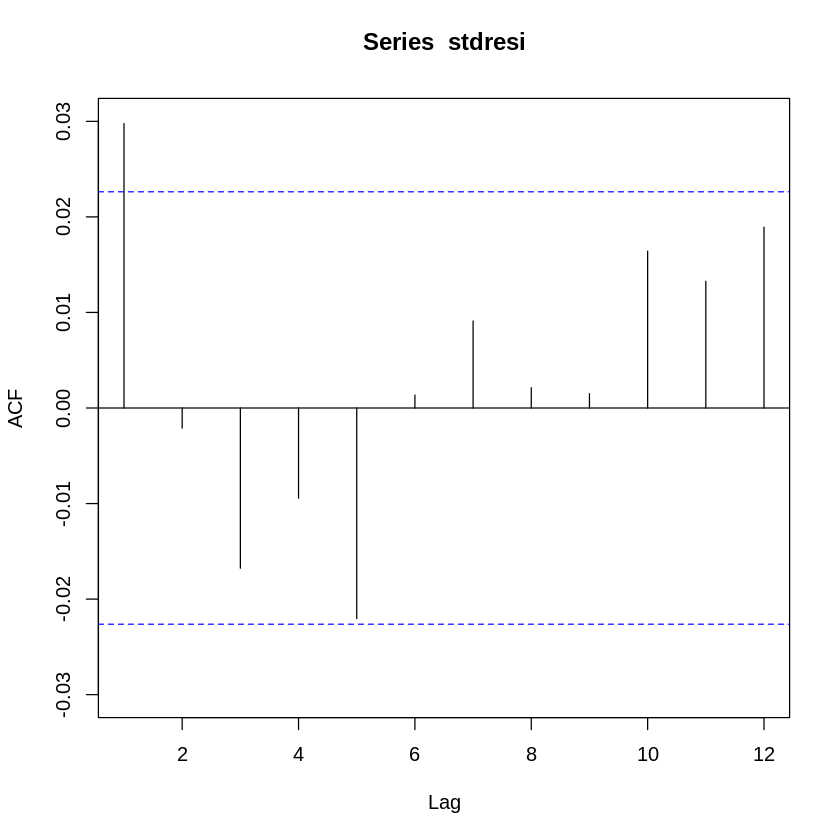


	Box-Ljung test

data:  stdresi^2
X-squared = 12.235843, df = 12, p-value = 0.4269296


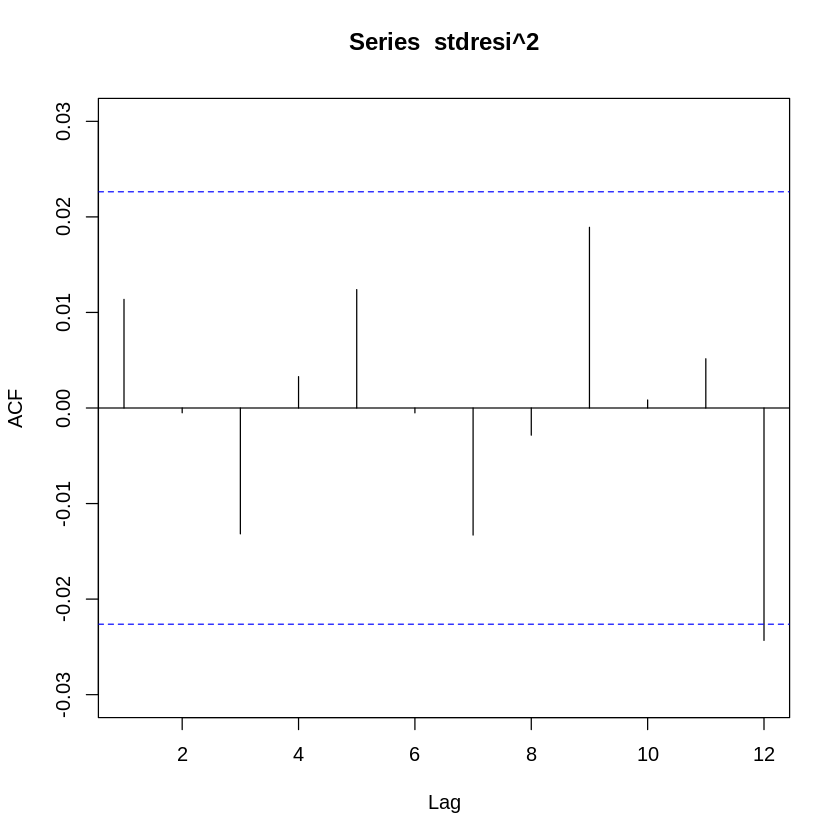

In [ ]:
acf(stdresi, lag.max = 12,xlim = c(1, 12),ylim = c(-0.03,0.03))

Box.test(stdresi, lag = 12, type = "Ljung-Box")

acf(stdresi^2, lag.max = 12,xlim = c(1, 12),ylim = c(-0.03,0.03))

Box.test(stdresi^2, lag = 12, type = "Ljung-Box")